In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor  
from sklearn.utils import shuffle
from matplotlib import style
from IPython.display import display 

# FUNCTIONS
def grad(x, y, w, b):
  m = x.shape[0]
  dw, db = 0, 0
  for i in range(m):
    dw = dw + (w*x[i] + b - y[i]) * x[i]
    db = db + (w*x[i] + b - y[i])
  return (dw/m), (db/m)

def cost(x, y, w, b):
  m = x.shape[0]
  c = 0
  for i in range(m):
    c += (w*x[i] + b - y[i])**2
  return (1 / (2 * m) * c);

def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
  J, W, B = [], [], []
  w, b = w_in, b_in

  for i in range(num_iters):
    dw, db = grad(x, y, w, b)
    w = w - alpha * dw
    b = b - alpha * db
    if i < 1e6:
      J.append(cost(x, y, w, b))
      W.append(w)
      B.append(b)
  return w, b, J, W, B

def line(x, w, b):
  return w*x + b

def display_plot(iter, w, b, x_train, y_train):
  cost_string = cost(x_train, y_train, w, b)

  # Display regression line
  x_val = np.linspace(min(x_train), max(x_train), 2)
  y_val = line(x_val, w, b)
  plt.plot(x_val, y_val, c = "red")

  # Additional info about plot
  plt.scatter(data['Height'], data['Weight'])
  plt.title("Iterations = " + str(iter))
  plt.text(63.5, 238, cost_string, fontsize=12, color="black")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

# Data processing
data = pd.read_csv("weight-height.csv", nrows=50)

x_train = np.array(data['Height'])
y_train = np.array(data['Weight'])

#Feature scaling
scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train.reshape(-1,1)).flatten()
# y_train = scaler.fit_transform(y_train.reshape(-1,1)).flatten()

display(data)
display(x_train)
display(y_train) 

ModuleNotFoundError: No module named 'pandas'

In [2]:
# Train model using hand written fucntions
iter, w_in, b_in, alpha = 5000, 0, 0, 0.000418
w, b, J, W, B = gradient_descent(x_train, y_train, w_in, b_in, alpha, iter)

In [16]:
sgdr = SGDRegressor(max_iter=iter, eta0=alpha)
sgdr_x_train = x_train.reshape(-1,1)
sgdr.fit(sgdr_x_train, y_train)

SGDRegressor(eta0=0.000418, max_iter=5000)

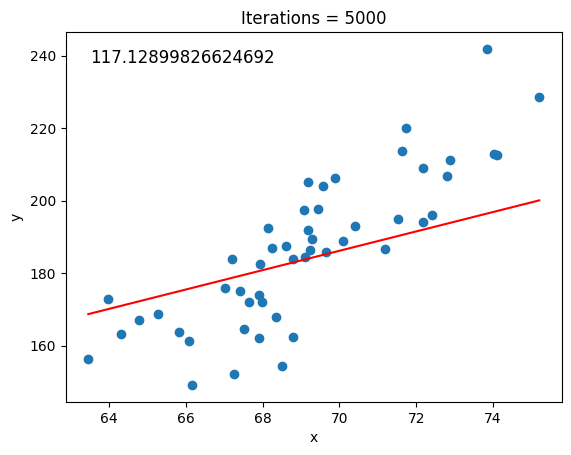

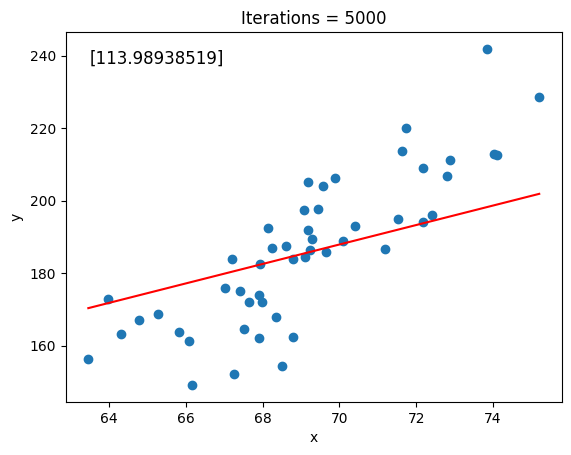

In [17]:
# Display plot 1 of hand-written GD
display_plot(iter, w, b, x_train, y_train)

# Display plot 2 of Scikit Learn's GD
display_plot(iter, sgdr.coef_, sgdr.intercept_, x_train, y_train)

In [18]:
print(sgdr, sgdr.coef_, sgdr.intercept_, sgdr.eta0) # Print attributes of SGDR model

SGDRegressor(eta0=0.000418, max_iter=5000) [2.68440295] [0.02020341] 0.000418
